In [ ]:
# importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
! unzip '/content/Hand.zip'

Archive:  /content/Hand.zip
   creating: Hand/A/
  inflating: Hand/A/A1.jpg           
  inflating: Hand/A/A10.jpg          
  inflating: Hand/A/A100.jpg         
  inflating: Hand/A/A101.jpg         
  inflating: Hand/A/A102.jpg         
  inflating: Hand/A/A103.jpg         
  inflating: Hand/A/A104.jpg         
  inflating: Hand/A/A105.jpg         
  inflating: Hand/A/A106.jpg         
  inflating: Hand/A/A107.jpg         
  inflating: Hand/A/A108.jpg         
  inflating: Hand/A/A109.jpg         
  inflating: Hand/A/A11.jpg          
  inflating: Hand/A/A110.jpg         
  inflating: Hand/A/A111.jpg         
  inflating: Hand/A/A112.jpg         
  inflating: Hand/A/A113.jpg         
  inflating: Hand/A/A114.jpg         
  inflating: Hand/A/A115.jpg         
  inflating: Hand/A/A116.jpg         
  inflating: Hand/A/A117.jpg         
  inflating: Hand/A/A118.jpg         
  inflating: Hand/A/A119.jpg         
  inflating: Hand/A/A12.jpg          
  inflating: Hand/A/A120.jpg         
 

In [ ]:
import pathlib
data_dir = "/content/Hand"

In [ ]:
# Load and preprocess data (You'll need to replace 'train_dir' and 'val_dir' with your directory paths)
train_dir = '/content/Hand'
val_dir = '/content/Hand'
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical')

Found 3000 images belonging to 5 classes.
Found 3000 images belonging to 5 classes.


In [ ]:
# Defining Alexnet model

def create_alexnet():
    input_layer = Input(shape=(227, 227, 3))
    x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(input_layer)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Conv2D(256, (5, 5), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

num_classes =  5
model = create_alexnet()
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Assuming you have 3000 training samples, you may adjust epochs and steps_per_epoch accordingly.
epochs = 5
steps_per_epoch = 3000 // 32

history = model.fit(train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=val_generator)


Epoch 1/5
93/93 [==============================] - 705s 8s/step - loss: 1.5636 - accuracy: 0.3514 - val_loss: 0.6524 - val_accuracy: 0.7190
Epoch 2/5
93/93 [==============================] - 679s 7s/step - loss: 0.4063 - accuracy: 0.8366 - val_loss: 0.1461 - val_accuracy: 0.9380
Epoch 3/5
93/93 [==============================] - 687s 7s/step - loss: 0.1624 - accuracy: 0.9383 - val_loss: 0.0753 - val_accuracy: 0.9673
Epoch 4/5
93/93 [==============================] - 681s 7s/step - loss: 0.0949 - accuracy: 0.9714 - val_loss: 0.0662 - val_accuracy: 0.9780
Epoch 5/5
93/93 [==============================] - 683s 7s/step - loss: 0.0822 - accuracy: 0.9730 - val_loss: 0.0411 - val_accuracy: 0.9903


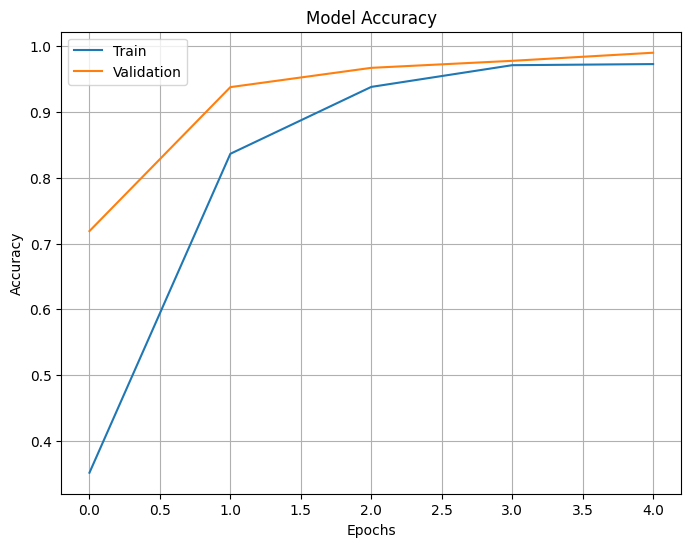

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have 'history' from the previous training
# Plot Model Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
# Get predictions on validation data
y_pred = model.predict(val_generator)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

94/94 [==============================] - 136s 1s/step


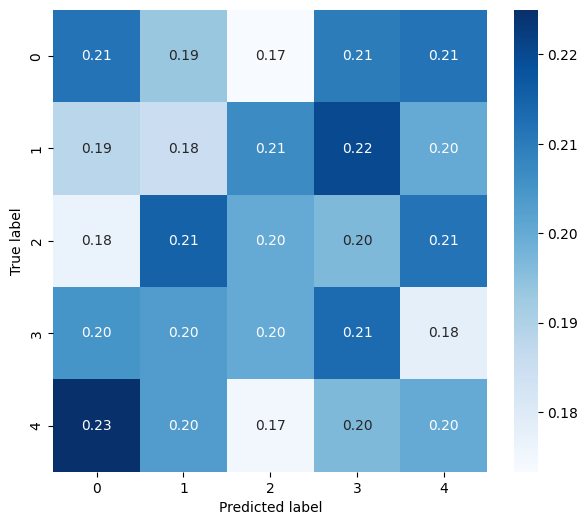

In [ ]:
# Calculate and plot the confusion matrix
cf_mat = confusion_matrix(val_generator.classes, y_pred_labels)
cf_mat_normalized = cf_mat.astype('float') / cf_mat.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(7, 6))
sns.heatmap(cf_mat_normalized, cmap="Blues", annot=True, fmt=".2f")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Print classification report and evaluation metrics
print("Classification Report:")
print(classification_report(val_generator.classes, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.21      0.21       600
           1       0.18      0.18      0.18       600
           2       0.21      0.20      0.20       600
           3       0.21      0.21      0.21       600
           4       0.20      0.20      0.20       600

    accuracy                           0.20      3000
   macro avg       0.20      0.20      0.20      3000
weighted avg       0.20      0.20      0.20      3000



In [ ]:
# Evaluate the model on validation data
loss, accuracy = model.evaluate(val_generator)
print("Test Loss:", round(loss * 100, 3), '%')
print("Test Accuracy:", round(accuracy * 100, 3), '%')

94/94 [==============================] - 134s 1s/step - loss: 0.0411 - accuracy: 0.9903
Test Loss: 4.11 %
Test Accuracy: 99.033 %


1/1 [==============================] - 0s 89ms/step


['B']

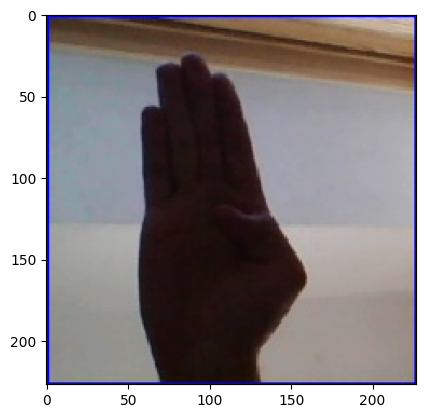

In [ ]:
from tensorflow.keras.preprocessing import image

#Creating a dictionary to map each of the indexes to the corresponding number or letter
from tensorflow.keras.preprocessing import image
dict = {0:"A",1:"B",2:"C",3:"D",4:"E"}


#Predicting images

img = image.load_img("/content/Hand/B/B104.jpg", target_size=(227,227))
x = image.img_to_array(img)
plt.imshow(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
classes = model.predict(image, batch_size=32)
label = [np.argmax(i) for i in classes]
pred_class=[dict[x] for x in label]
pred_class